- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0,'../pestools')

In [3]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final_4yrs_su


In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [7]:
directory_name = 'Case5_su_cv_rw.demo'
cf_name = 'Case5_su_cv_cf_v1_rw' # Control file name

In [8]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

#### b. Parameter Sensitivity 

In [9]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
1,0.000073,0.000424,0.000002,0.000012,0.000010,0.000008,12947.0,3731150.0,0.000000e+00,0.000029,0.000000e+00,1.943520e-08
2,0.000049,0.000172,0.000002,0.000010,0.000010,0.000008,39825.4,2387100.0,0.000000e+00,0.000030,0.000000e+00,1.710660e-08
3,0.000076,0.000537,0.000002,0.000012,0.000010,0.000008,30233.3,1185430.0,2.736590e-17,0.000031,5.473180e-17,2.139590e-08
4,0.000042,0.000625,0.000002,0.000010,0.000011,0.000008,36218.4,1431840.0,2.779250e-17,0.000038,5.558500e-17,2.786150e-08
5,0.000035,0.000860,0.000002,0.000010,0.000010,0.000008,22653.9,7195940.0,2.732230e-17,0.000030,5.464470e-17,2.645130e-08
6,0.000042,0.001235,0.000002,0.000009,0.000010,0.000008,20890.9,10866100.0,2.754860e-17,0.000033,5.509730e-17,2.446290e-08
7,0.000036,0.000648,0.000002,0.000008,0.000010,0.000008,24502.0,5600260.0,2.720290e-17,0.000031,5.440580e-17,2.455080e-08
8,0.000043,0.001540,0.000002,0.000008,0.000010,0.000009,46131.7,14354000.0,2.760990e-17,0.000033,5.521980e-17,2.198730e-08
9,0.000031,0.001471,0.000002,0.000008,0.000010,0.000009,43496.2,14343800.0,2.786190e-17,0.000033,5.572380e-17,2.475100e-08


In [10]:
len(sen_iteration.columns.values)

12

In [11]:
np.arange(len(sen_iteration.columns.values))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

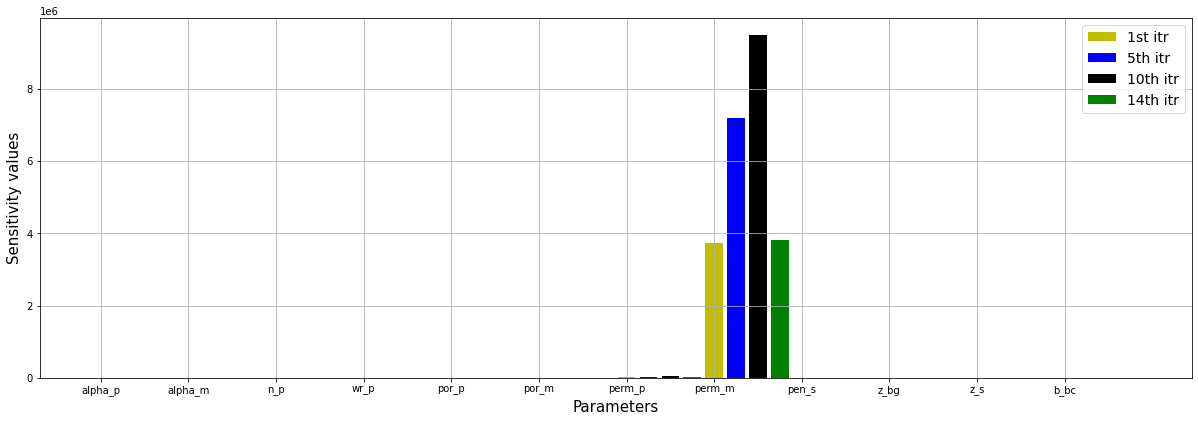

In [12]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])

#for
X = np.arange(len(sen_iteration.columns.values)) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[4,:], color='b', label='5th itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[9,:], color='k', label='10th itr', width=0.2)
ax.bar(X + 0.75, sen_iteration.iloc[13,:], color='g', label='14th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values

In [13]:
sen_iteration.iloc[0,:].max()

3731150.0

In [14]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = relative_set_itr.iloc[0,:]/relative_set_itr.iloc[0,:].max()

relative_set_itr

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
1,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
2,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
3,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
4,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
5,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
6,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
7,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
8,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15
9,1.961674e-11,1.135615e-10,5.471986e-13,3.178511e-12,2.578556e-12,2.203490e-12,0.00347,1.0,0.0,7.804913e-12,0.0,5.208903e-15


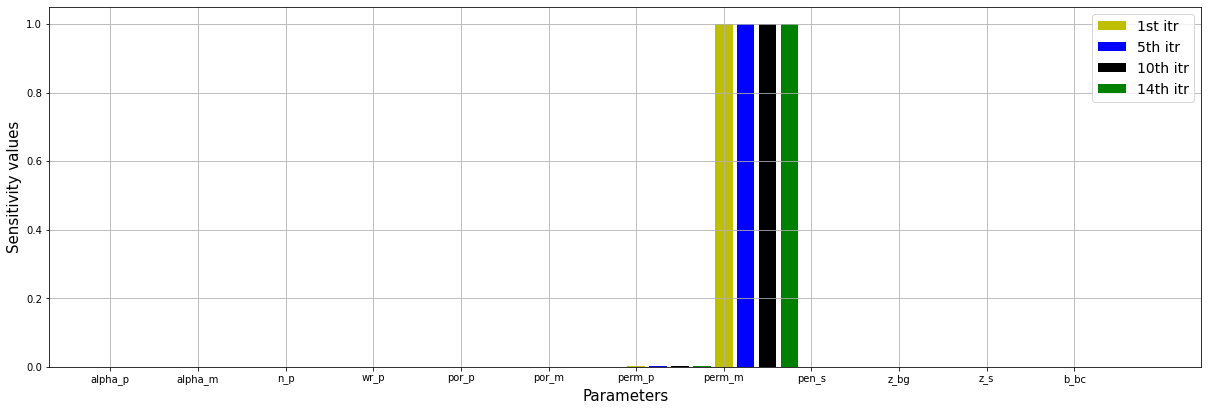

In [15]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = X = np.arange(len(sen_iteration.columns.values)) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[4,:], color='b', label='5th itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[9,:], color='k', label='10th itr', width=0.2)
ax.bar(X + 0.75, relative_set_itr.iloc[13,:], color='g', label='14th itr', width=0.2)



#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

### Plotting the change in parameters:


In [16]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
0,0.010000,0.001825,1.50000,0.100000,0.637390,0.481031,5.346620e-11,1.000000e-13,0.02,0.040000,0.005,268.45
1,0.011664,0.001887,1.49945,0.109078,0.595548,0.461879,1.581690e-11,1.539260e-13,0.02,0.042963,0.005,268.45
2,0.011295,0.001022,1.49929,0.118089,0.565902,0.447722,1.457470e-11,1.750000e-13,0.02,0.041089,0.005,268.45
3,0.011900,0.000694,1.49782,0.124027,0.541360,0.436194,1.566510e-11,1.750000e-13,0.02,0.040082,0.005,268.45
4,0.012342,0.000688,1.49782,0.134216,0.513588,0.423354,1.939170e-11,4.146160e-14,0.02,0.042180,0.005,268.45
5,0.011497,0.000456,1.49640,0.141879,0.493919,0.412770,2.280180e-11,4.027250e-14,0.02,0.043175,0.005,268.45
6,0.012500,0.000550,1.49571,0.145566,0.484297,0.407067,1.765270e-11,5.322480e-14,0.02,0.044343,0.005,268.45
7,0.012500,0.000456,1.49488,0.150308,0.474877,0.401069,1.480880e-11,5.491520e-14,0.02,0.043830,0.005,268.45
8,0.012500,0.000456,1.49356,0.155640,0.462982,0.392862,1.336660e-11,4.573730e-14,0.02,0.043448,0.005,268.45


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [17]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
0,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0000,0.0,0.00000,0.0,0.0
1,16.6410,3.409483,-0.036667,9.078,-6.564584,-3.981448,-70.417011,53.9260,0.0,7.40800,0.0,0.0
2,12.9460,-44.023541,-0.047333,18.089,-11.215739,-6.924502,-72.740348,75.0000,0.0,2.72325,0.0,0.0
3,19.0030,-61.989413,-0.145333,24.027,-15.066129,-9.321021,-70.700929,75.0000,0.0,0.20500,0.0,0.0
4,23.4220,-62.289647,-0.145333,34.216,-19.423273,-11.990288,-63.730918,-58.5384,0.0,5.45050,0.0,0.0
5,14.9710,-74.999918,-0.240000,41.879,-22.509139,-14.190562,-57.352870,-59.7275,0.0,7.93875,0.0,0.0
6,25.0000,-69.836869,-0.286000,45.566,-24.018733,-15.376140,-66.983440,-46.7752,0.0,10.85775,0.0,0.0
7,25.0000,-74.999918,-0.341333,50.308,-25.496635,-16.623045,-72.302501,-45.0848,0.0,9.57575,0.0,0.0
8,25.0000,-74.999918,-0.429333,55.640,-27.362839,-18.329172,-74.999906,-54.2627,0.0,8.62075,0.0,0.0


#### Line plot of all parameter values


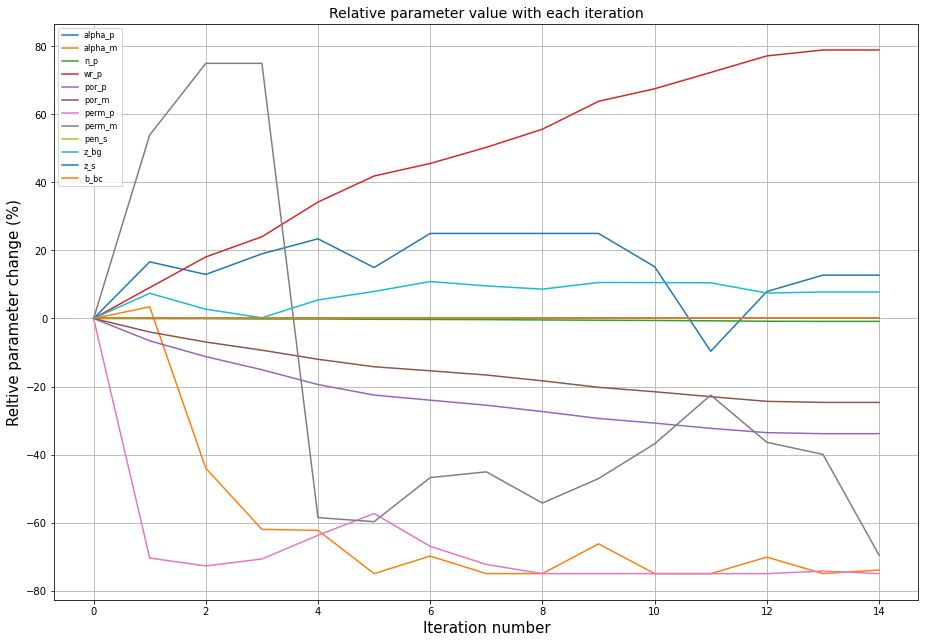

In [18]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

### c. Objective function

In [19]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [20]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,260.6422,260.326172,0.316028,0.00025
1,stemp_0.04_1,temp,261.2884,263.253965,-1.965565,0.00025
2,stemp_0.04_2,temp,261.3255,261.778190,-0.452690,0.00025
3,stemp_0.04_3,temp,261.1522,260.179815,0.972385,0.00025
4,stemp_0.04_4,temp,260.7784,260.879565,-0.101165,0.00025


#### Analyzing the residual weights:


In [21]:
res_1['Weight'].describe()

count    15344.000000
mean         0.000149
std          0.000102
min          0.000047
25%          0.000047
50%          0.000149
75%          0.000250
max          0.000250
Name: Weight, dtype: float64

In [22]:
res_1['Weight'].unique()

array([2.503535e-04, 4.688476e-05])

In [23]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [24]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,260.326172,0.316028,0.00025,0.000079,0.316028,0.000079,6.259772e-09,0.000161
1,stemp_0.04_1,temp,261.2884,263.253965,-1.965565,0.00025,-0.000492,1.965565,0.000492,2.421486e-07,0.006223
2,stemp_0.04_2,temp,261.3255,261.778190,-0.452690,0.00025,-0.000113,0.452690,0.000113,1.284425e-08,0.000330
3,stemp_0.04_3,temp,261.1522,260.179815,0.972385,0.00025,0.000243,0.972385,0.000243,5.926302e-08,0.001523
4,stemp_0.04_4,temp,260.7784,260.879565,-0.101165,0.00025,-0.000025,0.101165,0.000025,6.414594e-10,0.000016


In [25]:
res_phi_1['Weighted_Sq_Residual'].mean()

2.5358312599081476e-07

In [26]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,2.535831
2,2.340719
3,2.192805
4,2.054187
5,1.96683


In [27]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [28]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.004396,0.004396,0,0.002198,0.002198
1,23,0.003891,0.003891,0,0.002177,0.001714
2,45,0.003592,0.003592,0,0.002164,0.001427
3,78,0.003365,0.003365,0,0.002152,0.001213
4,112,0.003152,0.003152,0,0.002143,0.001009
5,146,0.003018,0.003018,0,0.002143,0.000875
6,180,0.002953,0.002953,0,0.002138,0.000815
7,214,0.002899,0.002899,0,0.002140,0.000760
8,248,0.002832,0.002832,0,0.002132,0.000699
9,282,0.002767,0.002767,0,0.002129,0.000638


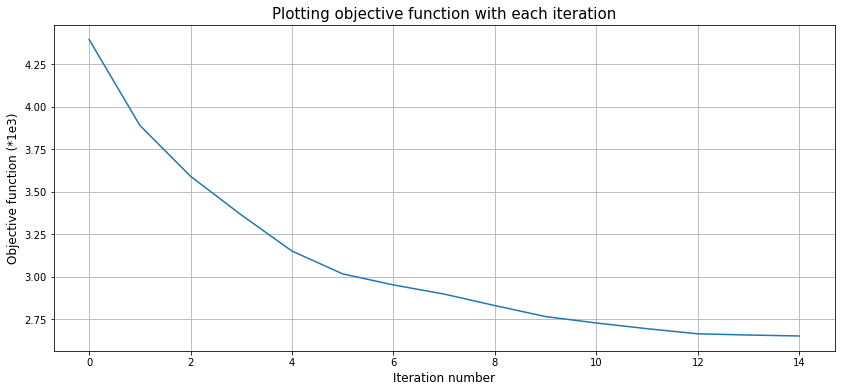

<Figure size 720x432 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**
- The objective function is reducing with each iteration.

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [30]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

14

In [31]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,260.326172,0.316028,0.00025,0.000079,0.316028,0.000079,6.259772e-09,0.000236
1,stemp_0.04_1,temp,261.2884,263.252268,-1.963868,0.00025,-0.000492,1.963868,0.000492,2.417309e-07,0.009112
2,stemp_0.04_2,temp,261.3255,261.772041,-0.446541,0.00025,-0.000112,0.446541,0.000112,1.249771e-08,0.000471
3,stemp_0.04_3,temp,261.1522,260.168017,0.984183,0.00025,0.000246,0.984183,0.000246,6.070984e-08,0.002288
4,stemp_0.04_4,temp,260.7784,260.879137,-0.100737,0.00025,-0.000025,0.100737,0.000025,6.360437e-10,0.000024


In [32]:
# The total length of observation values is 15344/2 = 7672
obs_gp_values = 7672

In [33]:
temp_measured = res_best.iloc[:obs_gp_values,2] # The 2nd column contains the measured values and we have only temperature values from the first 7672 values
mois_measured = res_best.iloc[obs_gp_values:,2]

temp_sim = res_best.iloc[:obs_gp_values,3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[obs_gp_values:,3]

temp_res = res_best.iloc[:obs_gp_values,4] # The 4th column contains the residual values 
mois_res = res_best.iloc[obs_gp_values:,4]

In [ ]:
### PLot all the three year values - Follow Output_analysis_Case1_su_cv_rw.ipynb

Text(0.5, 0, 'Days')

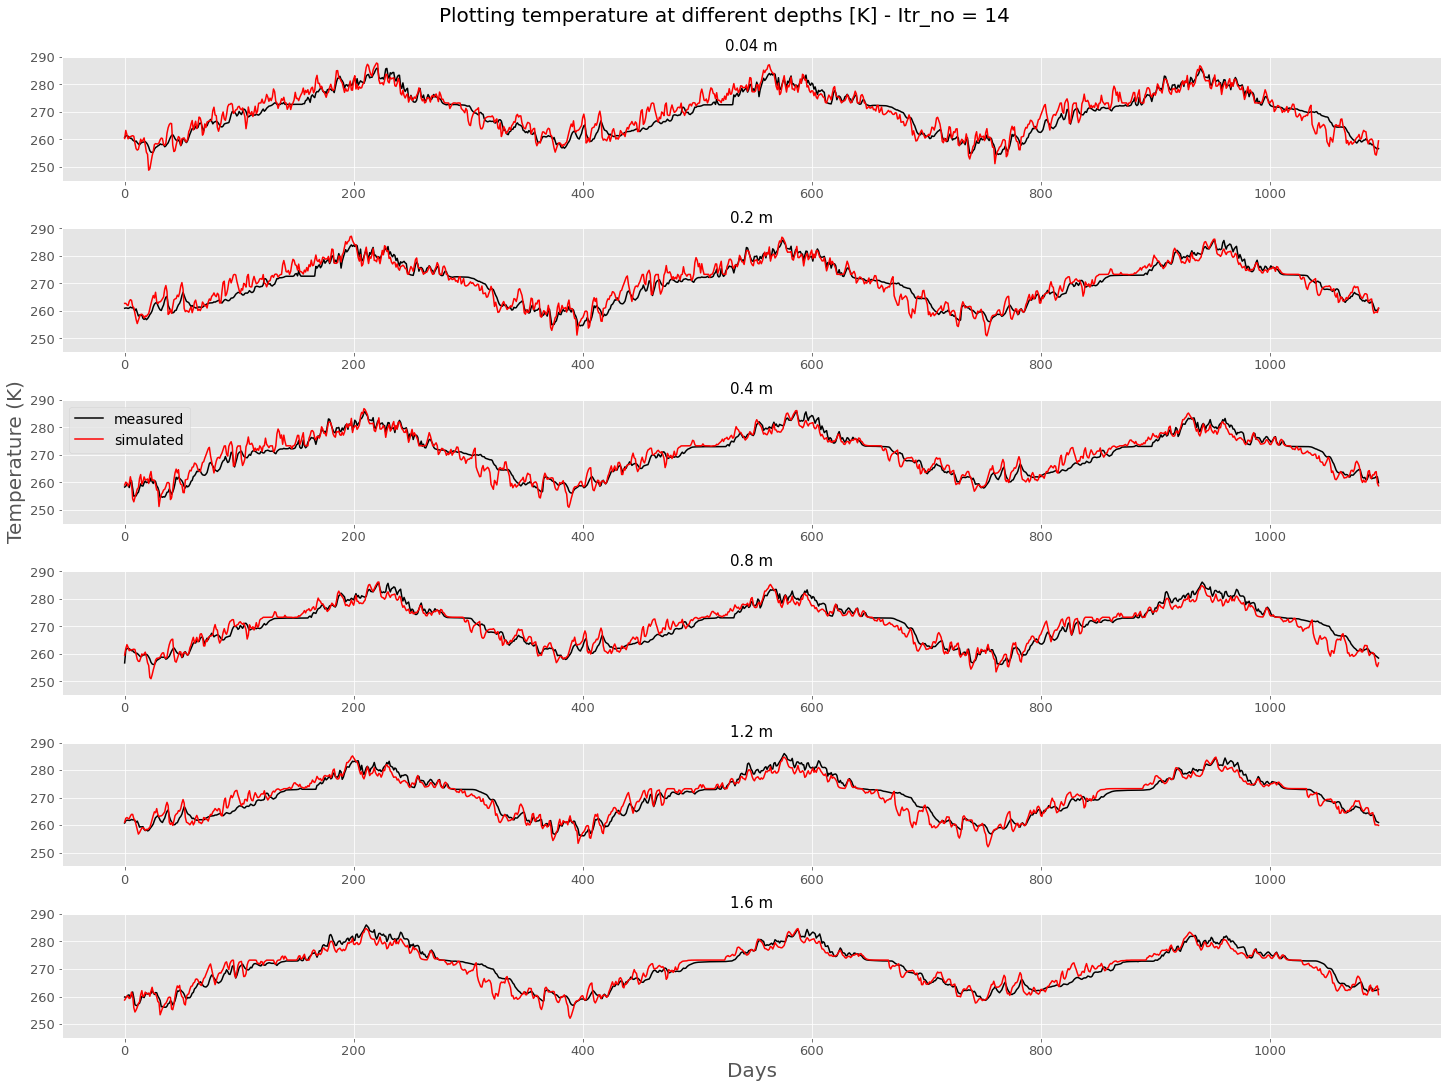

In [48]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+1096].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(245,290)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

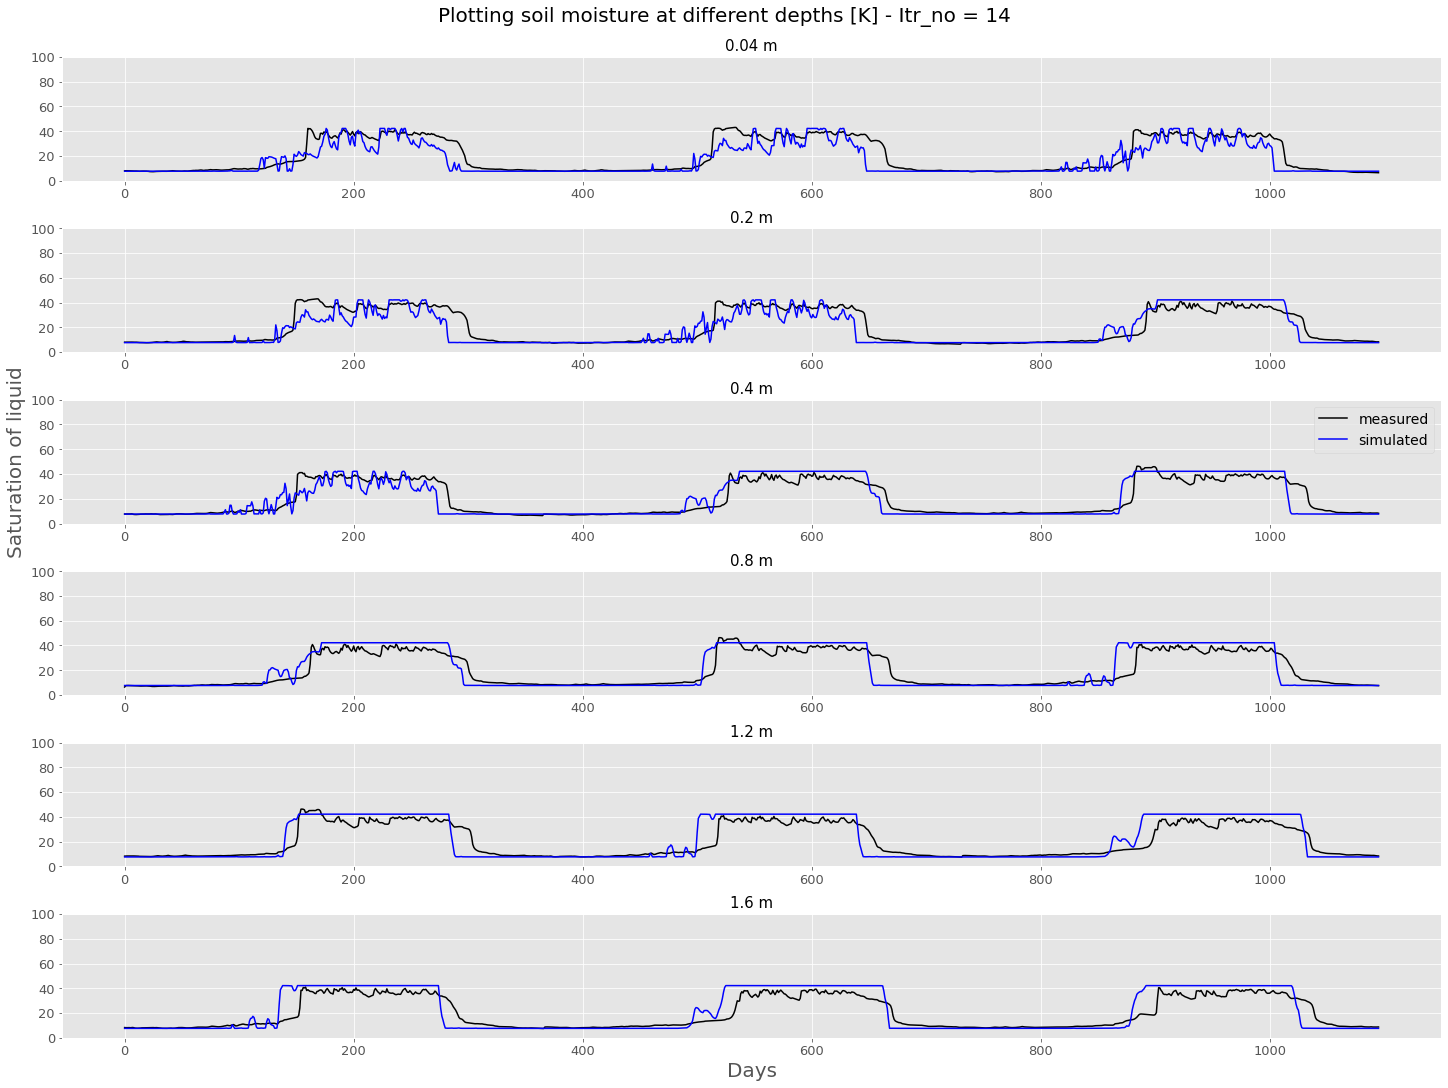

In [49]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+1096].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+1096].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

<Figure size 720x432 with 0 Axes>

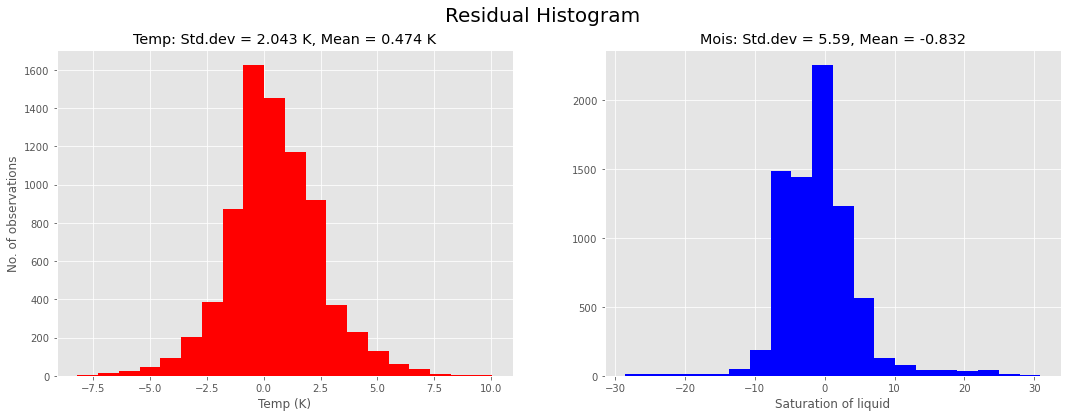

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [37]:
temp_res.describe()

count    7672.000000
mean        0.474172
std         2.042790
min        -8.196933
25%        -0.701917
50%         0.365875
75%         1.684413
max        10.063935
Name: Residual, dtype: float64

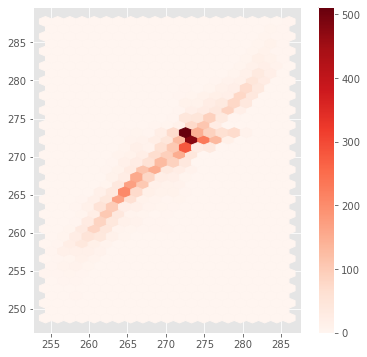

In [38]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

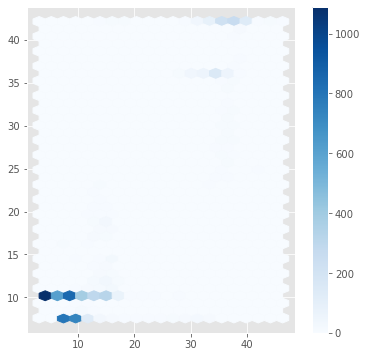

In [39]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

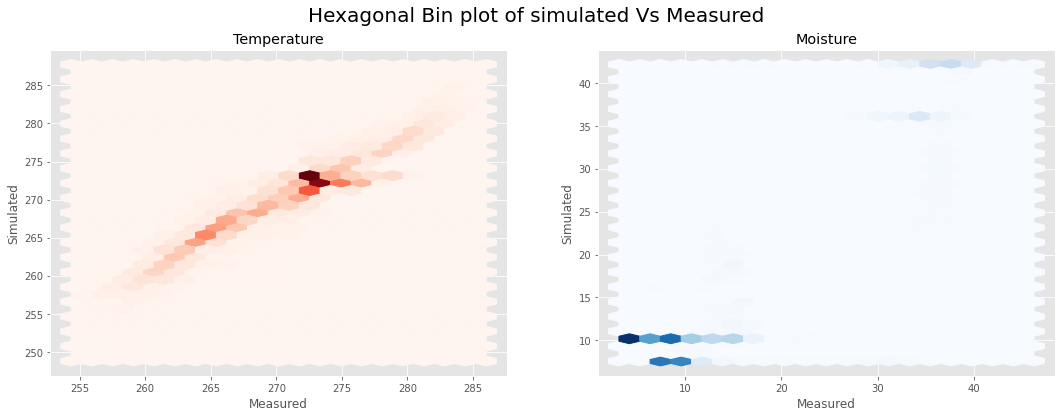

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [41]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.004396,0.004396,0,0.002198,0.002198
1,23,0.003891,0.003891,0,0.002177,0.001714
2,45,0.003592,0.003592,0,0.002164,0.001427
3,78,0.003365,0.003365,0,0.002152,0.001213
4,112,0.003152,0.003152,0,0.002143,0.001009
5,146,0.003018,0.003018,0,0.002143,0.000875
6,180,0.002953,0.002953,0,0.002138,0.000815
7,214,0.002899,0.002899,0,0.002140,0.000760
8,248,0.002832,0.002832,0,0.002132,0.000699
9,282,0.002767,0.002767,0,0.002129,0.000638


In [42]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([2114.47 ,  538.494])

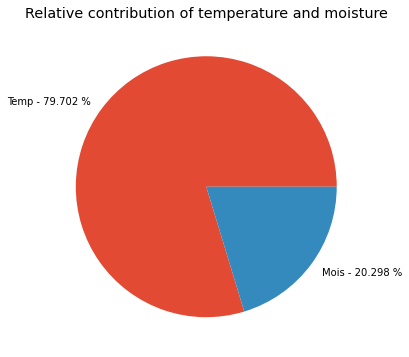

In [43]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [44]:
itrno_best

14

In [45]:
par_iteration.loc[itrno_best,:]

alpha_p    1.127320e-02
alpha_m    4.752780e-04
n_p        1.487230e+00
wr_p       1.789250e-01
por_p      4.215240e-01
por_m      3.623210e-01
perm_p     1.336660e-11
perm_m     3.045050e-14
pen_s      2.000000e-02
z_bg       4.311760e-02
z_s        5.000000e-03
b_bc       2.684500e+02
Name: 14, dtype: float64

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

#### 1. Parameters:

In [46]:
file_name = 'Case5_su_cv_rw'

In [47]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv(f'Final_comp_cases_data/best_params_{file_name}.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [138]:
res_best.to_csv(f'Final_comp_cases_data/best_res_{file_name}.csv',sep=',')

#### 3. Objective function

In [139]:
obj_iteration.to_csv(f'Final_comp_cases_data/obj_fn_{file_name}.csv',sep=',')

#### 4. Parameter sensitivity - best

In [140]:
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv(f'Final_comp_cases_data/best_sen_{file_name}.csv',sep=',')